In [2]:
import sys; sys.path.append("../../")
from DataPreprocessing.DataPreprocessing import *
from DataExploration import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Question:
    For games rated more than X, what is the most popular genre ?

## 1- Expectations:   
        For different ratings, there will be a different most popular genre.

## 2- Data Collection: 
    

## Read data 

In [3]:
df = read_data(kind='dataset')


## Handle Missing Values

In [22]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [4]:
df =handle_missing_values(df)
df.head()

Total Number of rows : 16719
Number of rows with missing values: 9894
Number of rows after dropping: 6825
Number of rows after handling missing values: 6825 and Number of missing values: 0


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [5]:
print(df['User_Score'].nunique())
print(df['Critic_Score'].nunique())
print(df['User_Score'].max())
print(df['User_Score'].min())
print(df['Critic_Score'].max())
print(df['Critic_Score'].min())

89
81
9.6
0.5
98.0
13.0


In [6]:
df_g_usr = df.groupby('User_Score')
df_g_crtc = df.groupby('Critic_Score')


In [7]:
user_bin_size = 0.5
crtc_bin_size = 5

In [8]:
df['User_Score'] = df['User_Score'].astype(float)
df['Critic_Score'] = df['Critic_Score'].astype(float)


In [9]:
# join groups with bin size (example: User_Score 0.4, 0.5, 1 will be joined together in one group)
df_g_usr = df.groupby(pd.cut(df['User_Score'], np.arange(0, (df['User_Score'].max())+user_bin_size, user_bin_size)))
df_g_crtc = df.groupby(pd.cut(df['Critic_Score'], np.arange(0, (df['Critic_Score'].max())+crtc_bin_size, crtc_bin_size)))


In [10]:
df['User_Score'].value_counts()

User_Score
7.8    294
8.0    259
8.2    258
8.5    238
7.9    235
      ... 
1.0      2
0.6      1
0.9      1
1.3      1
0.7      1
Name: count, Length: 89, dtype: int64

In [11]:

genres_per_rating_usr = pd.DataFrame(columns=['User_Score', 'Genre', 'Sales'])
for rating, group in df_g_usr:
    if group.empty:
        continue
    genres = group.groupby('Genre').sum()['Global_Sales']
    max_sales = genres.max()
    max_genre = genres[genres == max_sales].index[0]
    genres_per_rating_usr = pd.concat([
        genres_per_rating_usr,
        pd.DataFrame([[rating, max_genre, max_sales]], columns=['User_Score', 'Genre', 'Sales'])
    ])
genres_per_rating_usr = genres_per_rating_usr.reset_index(drop=True)
genres_per_rating_usr


,User_Score,Genre,Sales
0,"(0.0, 0.5]",Misc,0.14
1,"(0.5, 1.0]",Fighting,0.10
2,"(1.0, 1.5]",Action,0.23
3,"(1.5, 2.0]",Misc,1.80
4,"(2.0, 2.5]",Racing,2.33
5,"(2.5, 3.0]",Shooter,20.48
6,"(3.0, 3.5]",Shooter,37.63
7,"(3.5, 4.0]",Shooter,8.27
8,"(4.0, 4.5]",Sports,31.84
9,"(4.5, 5.0]",Action,23.22


In [12]:
genres_per_rating_crtc = pd.DataFrame(columns=['Critic_Score', 'Genre', 'Sales'])
for rating, group in df_g_crtc:
    # if group is empty, skip
    if group.empty:
        continue
    
    genres = group.groupby('Genre').sum()['Global_Sales']
    max_sales = genres.max()
    max_genre = genres[genres == max_sales].index[0]
    genres_per_rating_crtc = pd.concat([
        genres_per_rating_crtc,
        pd.DataFrame([[rating, max_genre, max_sales]], columns=['Critic_Score', 'Genre', 'Sales'])
    ])
genres_per_rating_crtc = genres_per_rating_crtc.reset_index(drop=True)
genres_per_rating_crtc


,Critic_Score,Genre,Sales
0,"(10.0, 15.0]",Racing,0.04
1,"(15.0, 20.0]",Misc,1.92
2,"(20.0, 25.0]",Misc,2.48
3,"(25.0, 30.0]",Misc,2.49
4,"(30.0, 35.0]",Action,2.87
5,"(35.0, 40.0]",Action,7.94
6,"(40.0, 45.0]",Action,13.54
7,"(45.0, 50.0]",Action,18.07
8,"(50.0, 55.0]",Action,33.56
9,"(55.0, 60.0]",Misc,53.62


<Figure size 2000x1000 with 0 Axes>

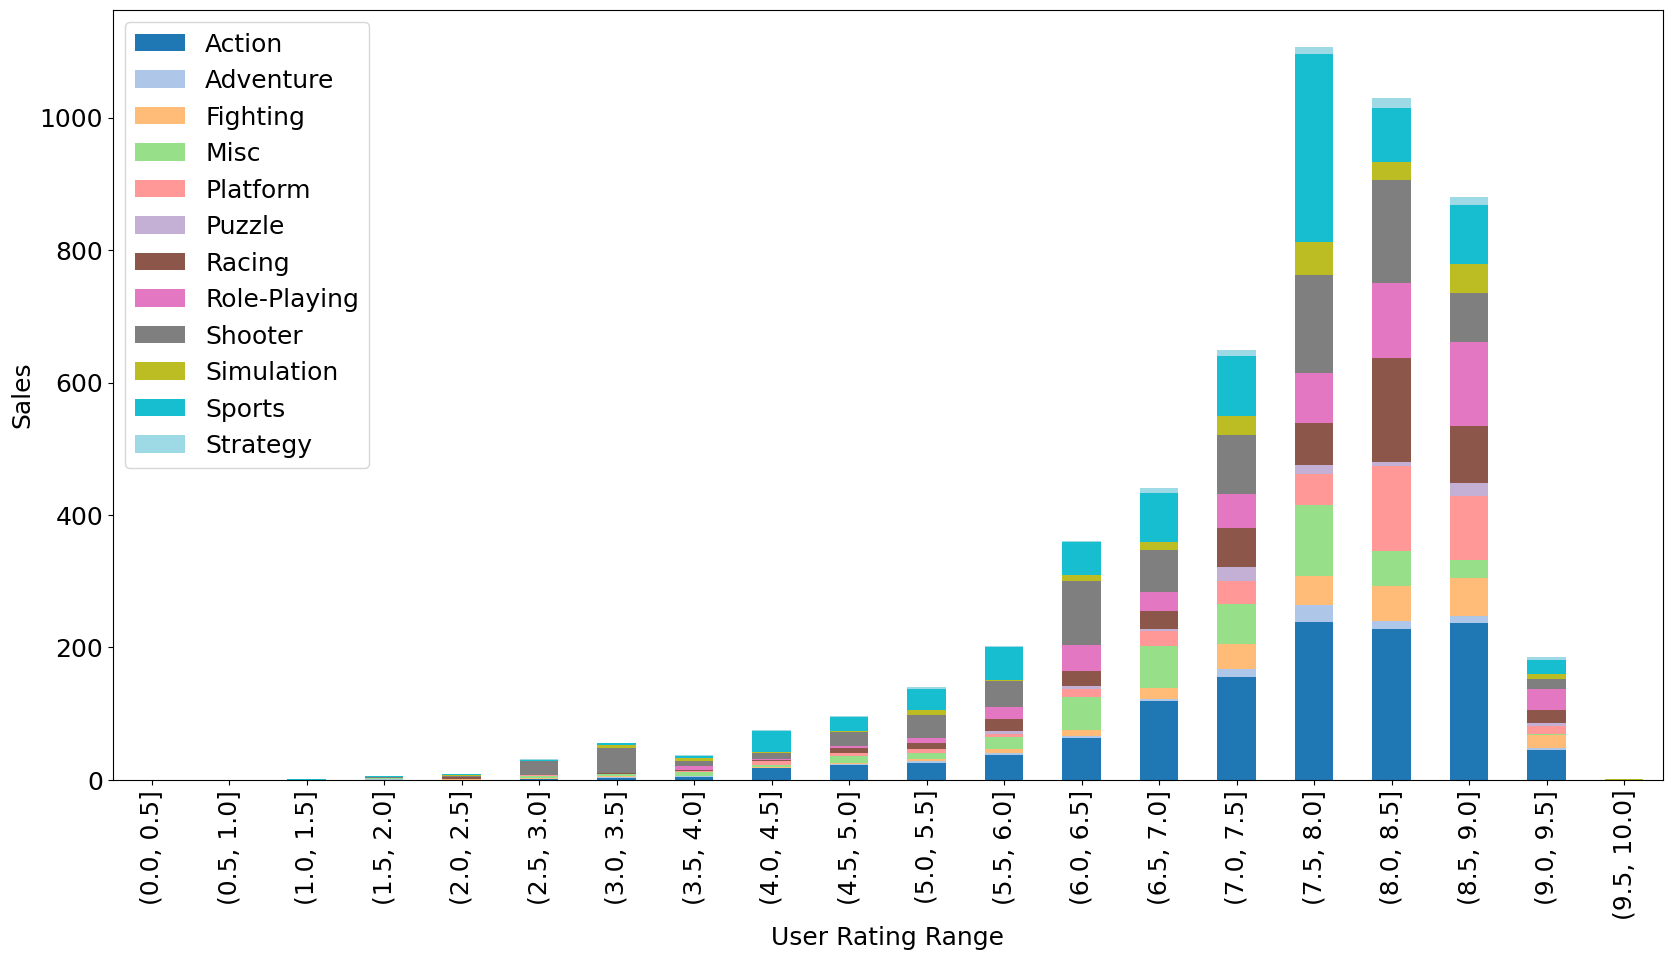

In [38]:
# Plot User Score
df2 = df.copy()
df2['Rating_Range'] = pd.cut(df2['User_Score'], bins=np.arange(0, (df['User_Score'].max())+user_bin_size, user_bin_size))

group_1 = df2.groupby(['Rating_Range', 'Genre']).sum()['Global_Sales']
pivot_table = group_1.reset_index().pivot(index='Rating_Range', columns='Genre', values='Global_Sales')

plt.figure(figsize=(20, 10))

# Create the stacked bar plot
ax = pivot_table.plot(kind='bar', stacked=True, colormap='tab20', figsize=(20, 10), fontsize=18)
ax.set_xlabel('User Rating Range', fontsize=18)
ax.set_ylabel('Sales', fontsize=18)
ax.legend(fontsize=18)
plt.show()

<Figure size 2000x1000 with 0 Axes>

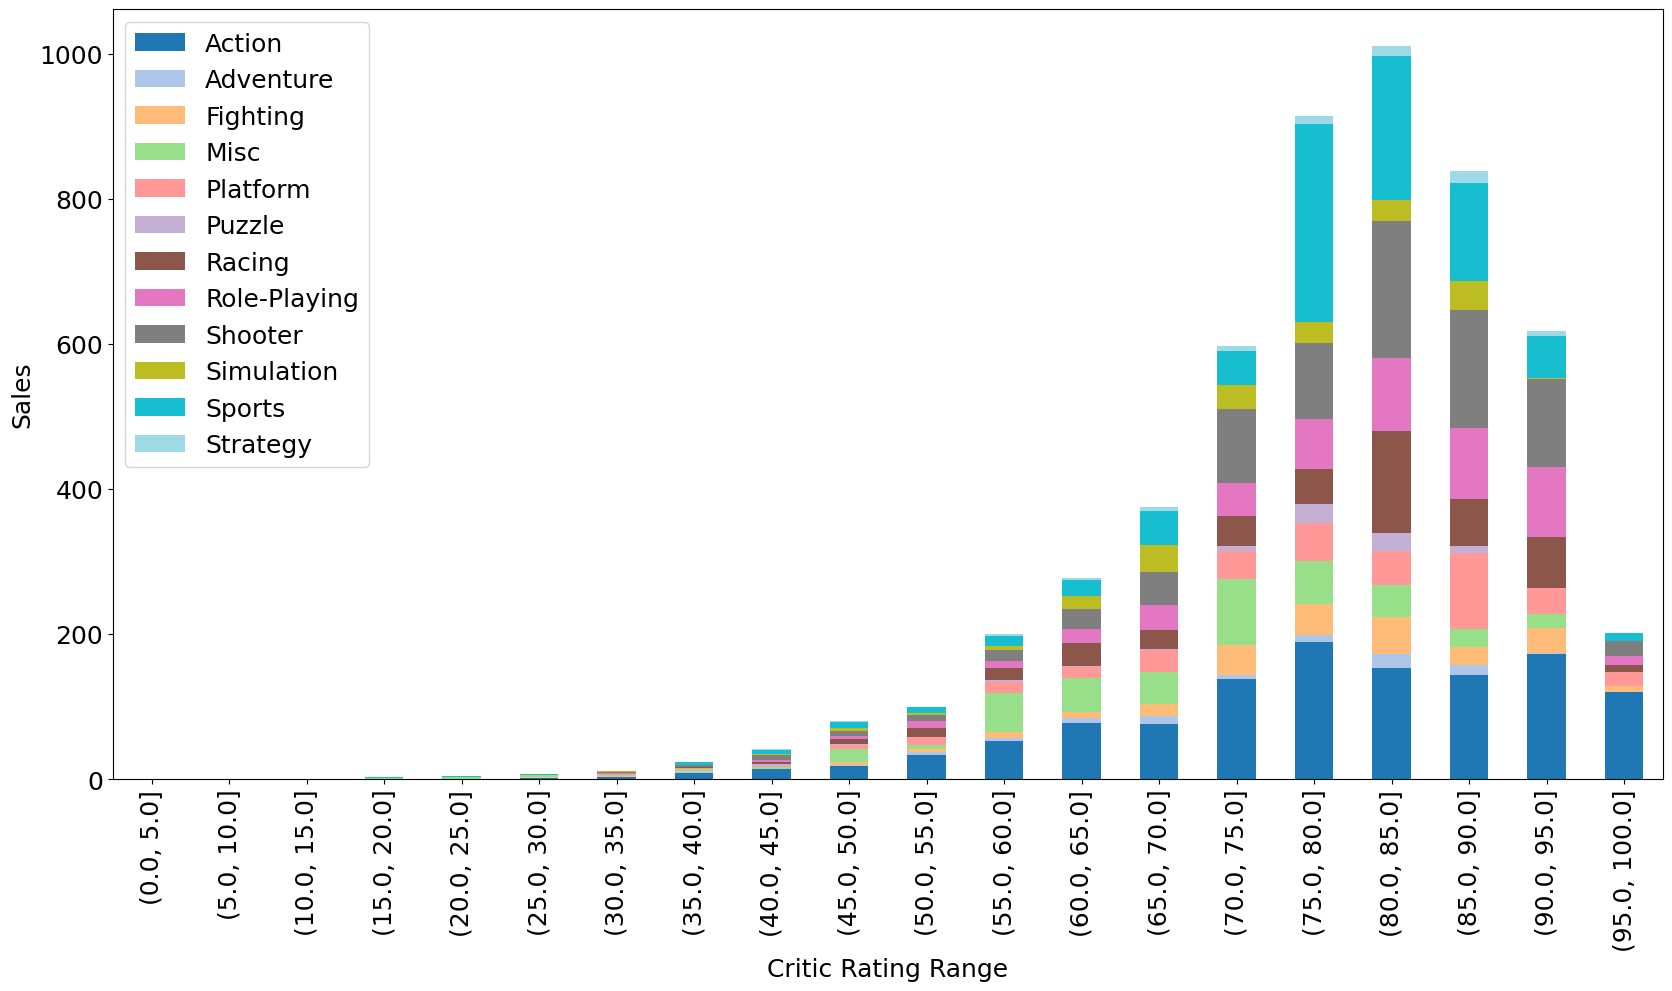

In [39]:
# stack plot for critic score
df3 = df.copy()
df3['Rating_Range'] = pd.cut(df3['Critic_Score'], bins=np.arange(0, (df['Critic_Score'].max())+crtc_bin_size, crtc_bin_size))

group_2 = df3.groupby(['Rating_Range', 'Genre']).sum()['Global_Sales']
pivot_table = group_2.reset_index().pivot(index='Rating_Range', columns='Genre', values='Global_Sales')

plt.figure(figsize=(20, 10))

# Create the stacked bar plot
ax = pivot_table.plot(kind='bar', stacked=True, colormap='tab20', figsize=(20, 10), fontsize=18)
ax.set_xlabel('Critic Rating Range', fontsize=18)
ax.set_ylabel('Sales', fontsize=18)
ax.legend(fontsize=18)
plt.show()



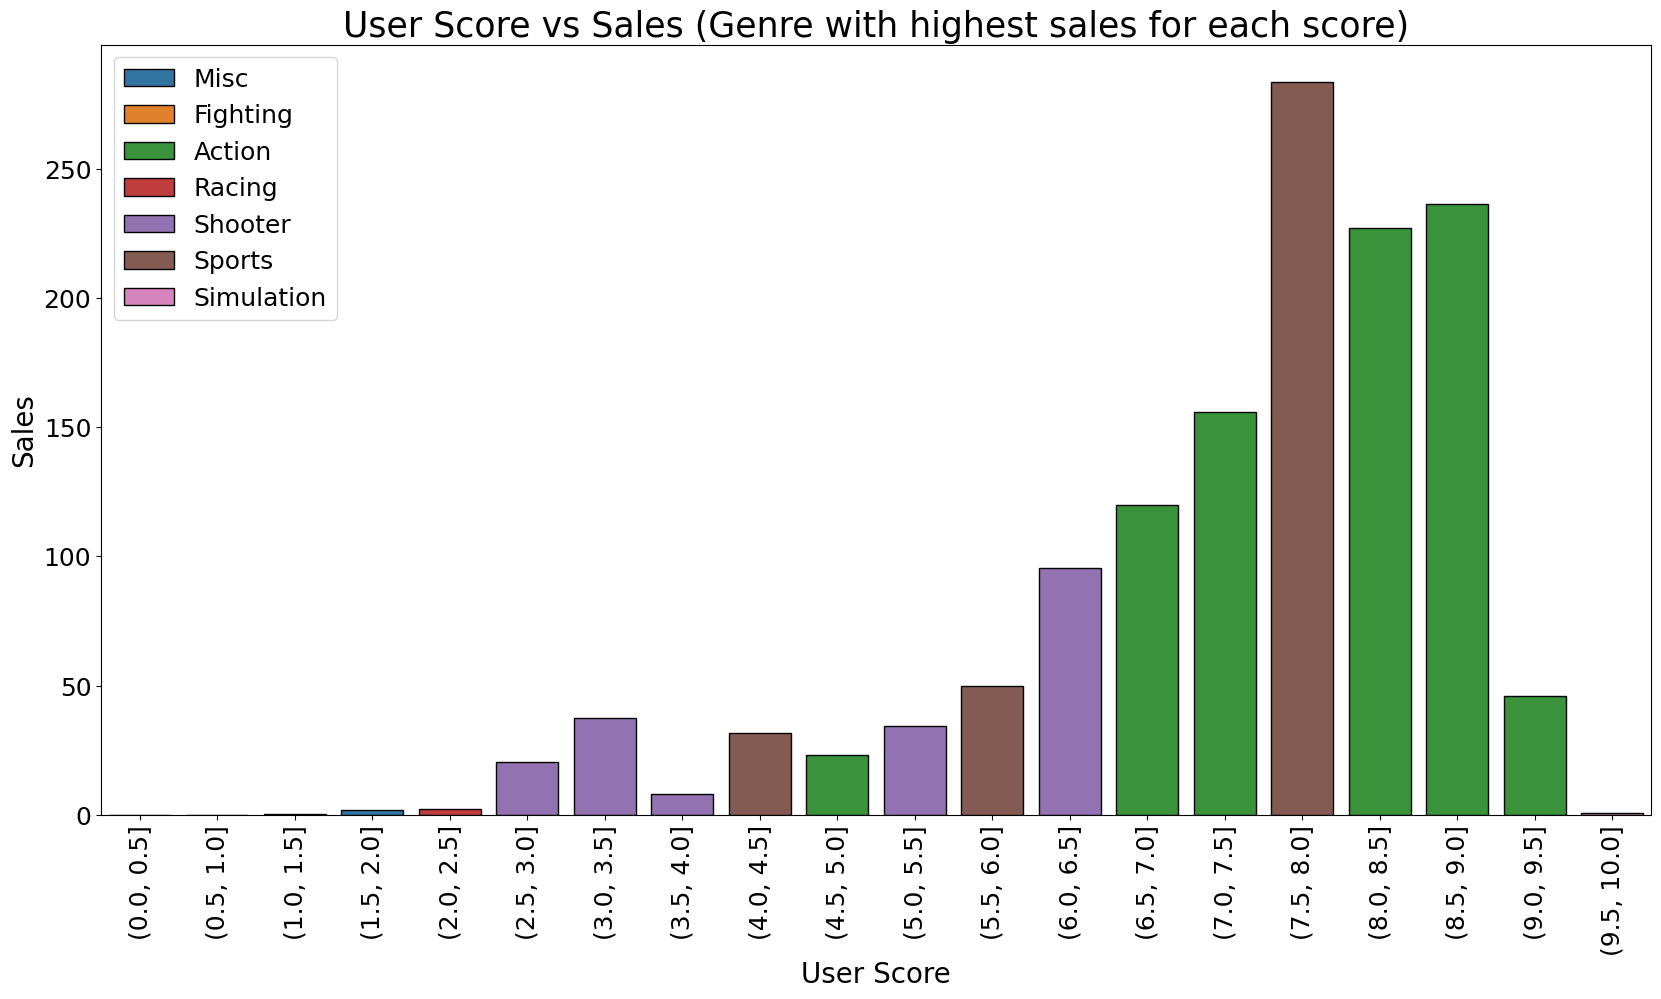

In [55]:
# plot User Score vs Sales, show the genre with the highest sales for each score

plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
ax = sns.barplot(x='User_Score', 
            y='Sales', 
            hue='Genre', 
            data=genres_per_rating_usr, 
            palette='tab10',
            edgecolor='black', 
            dodge=False
            )
for item in ax.get_xticklabels():
    item.set_fontsize(18)
for item in ax.get_yticklabels():
    item.set_fontsize(18)
ax.legend(fontsize=18)
plt.xlabel('User Score', fontsize=20)
plt.ylabel('Sales', fontsize=20)

plt.title('User Score vs Sales (Genre with highest sales for each score)', fontsize=25)
plt.show()

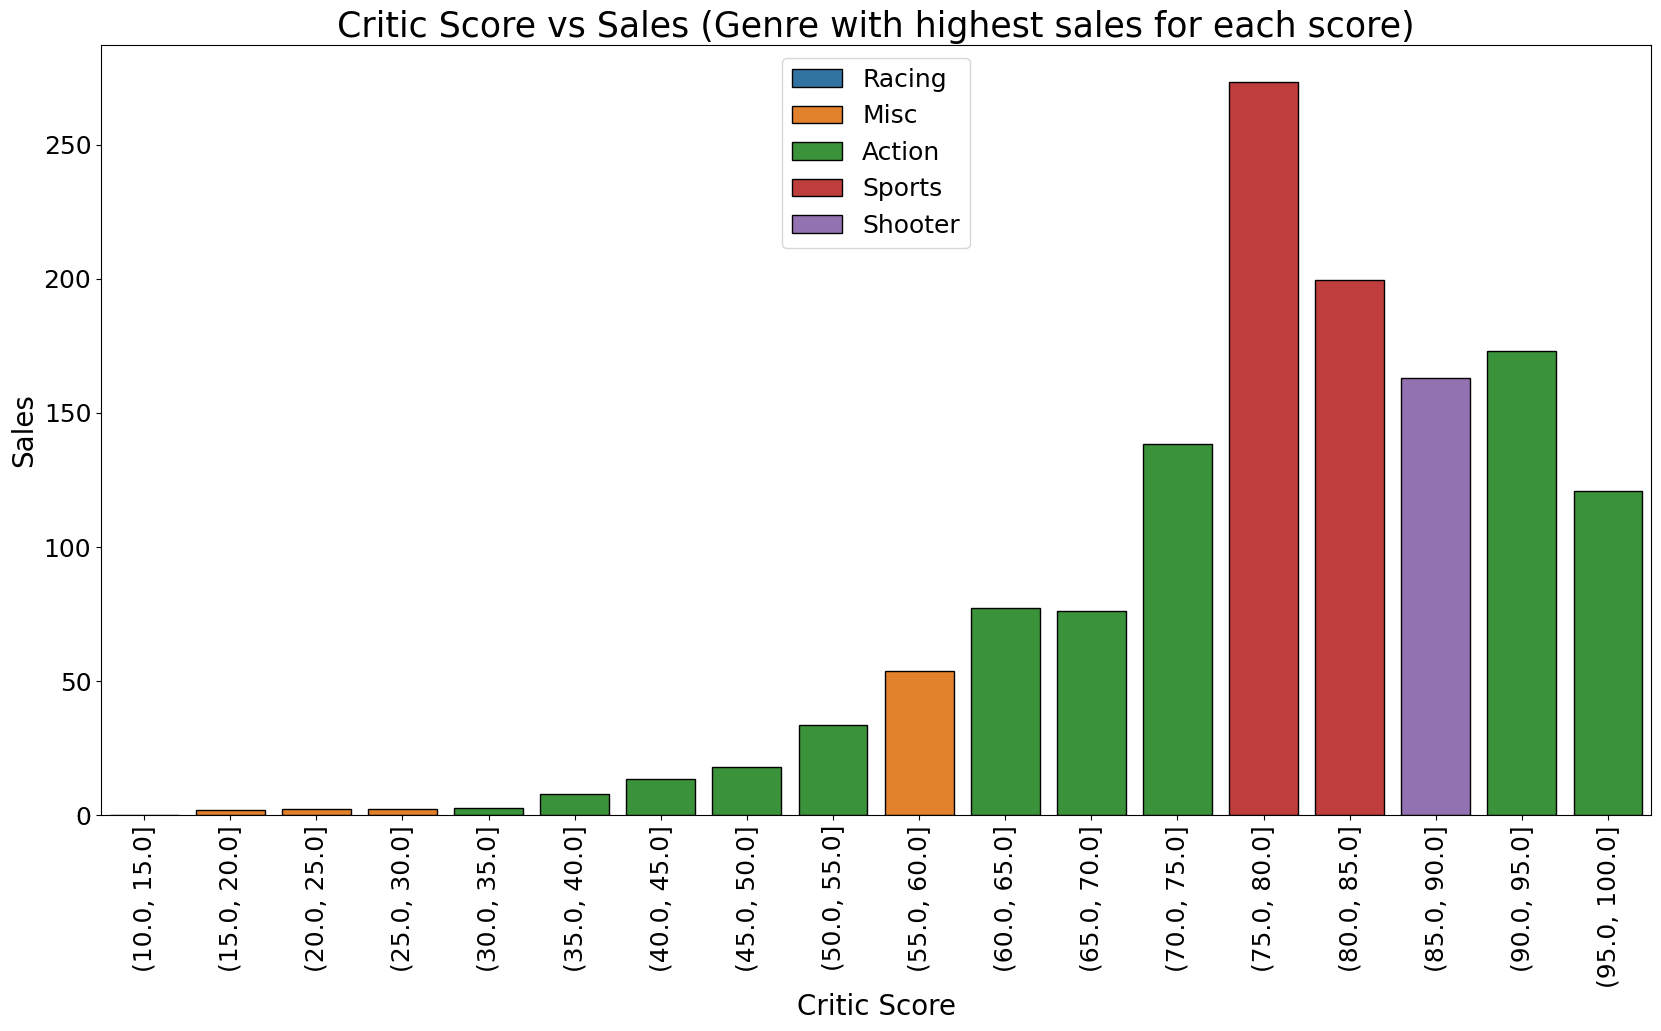

In [56]:
# plot Critic Score vs Sales, show the genre with the highest sales for each score

plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)

ax = sns.barplot(x='Critic_Score',
            y='Sales',
            hue='Genre',
            data=genres_per_rating_crtc,
            palette= 'tab10',
            edgecolor='black',
            dodge=False,
            )
# to increase tmp's font size in the previous line: 
for item in ax.get_xticklabels():
    item.set_fontsize(18)
for item in ax.get_yticklabels():
    item.set_fontsize(18)
ax.legend(fontsize=18)
plt.xlabel('Critic Score', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('Critic Score vs Sales (Genre with highest sales for each score)', fontsize=25)
plt.show()


---

## 3- Comparing Expectations to data:
        We see that for different ratings, there is a different most popular genre. We see that Action is the most popular genre for most ratings. Followed by Sports.
        

# TODO:   
- Imputation  
- Use Score counts  